In [ ]:
# Importing the required modules
import os
import sys
import pandas as pd
import re
import urllib
import csv
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup

#url to fetch html data 
my_url = 'https://www.prnewswire.com/news-releases/news-releases-list/?month=04&day=07&year=2021&hour=00&page=1&pagesize=100'
hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
       'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
       'Accept-Encoding': 'none',
       'Accept-Language': 'en-US,en;q=0.8',
       'Connection': 'keep-alive'}

UClient = uReq(urllib.request.Request(my_url, headers=hdr))
page = UClient.read()
UClient.close()
page_soup = soup(page, 'html.parser')
text_from_page = page_soup.get_text()

# coding=utf8
# the above tag defines encoding for this document 
#Scan a web page and retrieve details using regex.
regex = r"[A-Z]+\s*:\s*([A-Z]{2,})"
stock_symbol_postfix = []
stock_symbols = []
test_str = (text_from_page)

matches = re.finditer(regex, test_str, re.MULTILINE)

for matchNum, match in enumerate(matches, start=1):
    
    stock_symbols.append(match.group())
    for groupNum in range(0, len(match.groups())):
        groupNum = groupNum + 1
        if match.group(groupNum) not in stock_symbol_postfix:
          stock_symbol_postfix.append(match.group(groupNum))
        # print ("Group {groupNum} found at {start}-{end}: {group}".format(groupNum = groupNum, start = match.start(groupNum), end = match.end(groupNum), group = match.group(groupNum)))

#printing Stock's code 
print("Found stock symbols: ")
print(stock_symbols)
print(stock_symbol_postfix)


Found stock symbols: 
['NYSE: ASX', 'NASDAQ: MGI', 'NASDAQ: EBON', 'NYSE: GPX', 'NYSE: GPX', 'TSXV: VIPR', 'OTC:VIPRF', 'TSXV: VIPR', 'NEO: GRAM', 'OTCQX: GRAMF', 'PINK: GRMWF', 'BMV: CADU', 'NYSE: BLL', 'NYSE: NVST', 'NASD: IDCC', 'OTCQB:KAVL', 'OTCQB: KAVL', 'TSX: PPL', 'NYSE: PBA', 'NYSE: WFG', 'NYSE: RENN', 'NYSE: AMH', 'NYSE: RTX', 'NYSE: AES']
['ASX', 'MGI', 'EBON', 'GPX', 'VIPR', 'VIPRF', 'GRAM', 'GRAMF', 'GRMWF', 'CADU', 'BLL', 'NVST', 'IDCC', 'KAVL', 'PPL', 'PBA', 'WFG', 'RENN', 'AMH', 'RTX', 'AES']


In [ ]:
import os
import sys
import pandas as pd
import re
import urllib
import csv
from urllib.request import urlopen 
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt

#fetching stock data with help of stock_symbol using Yahoo finance api
try:
  def save_to_csv(stock_symbol):
    path = 'https://finance.yahoo.com/quote/'+stock_symbol+'/history?p='+stock_symbol

    # empty list
    data = []

    # for getting the header from the HTML file
    list_header = []
    # try:

    csv_soup = soup(urlopen(path),'html.parser')
    header = csv_soup.find_all("table")[0].find("tr")

    for items in header:
      try:
        list_header.append(items.get_text())
      except:
        continue

    # for getting the data
    HTML_data = csv_soup.find_all("table")[0].find_all("tr")[1:]
    if len(HTML_data)>1:
      for element in HTML_data:
        sub_data = []
        for sub_element in element:
          try:
            sub_data.append(sub_element.get_text())
          except:
            continue
        data.append(sub_data)
        
      # Storing the data into Pandas DataFrame
      dataFrame = pd.DataFrame(data = data, columns = list_header)
      # Converting Pandas DataFrame into CSV file
      filename_csv = stock_symbol + ".csv"
      dataFrame.head(10).to_csv(filename_csv)
      print("Created " + stock_symbol + ".csv")
      print([float(line.split()[0]) for line in dataFrame.head(10).get('Open')])
      plt.plot(np.array(dataFrame.head(10).get('Date')), [float(line.split()[0]) for line in dataFrame.head(10).get('Open')] , 'go--', linewidth=2)
      plt.rcParams['figure.figsize'] = [12, 8]
      plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
      plt.show()
except:
  print("Could not creat csv")


Created HTML File for ASX
Created ASX.csv
[7.76, 7.81, 7.95, 8.01, 7.98, 7.88, 7.85, 7.91, 8.02, 7.75]


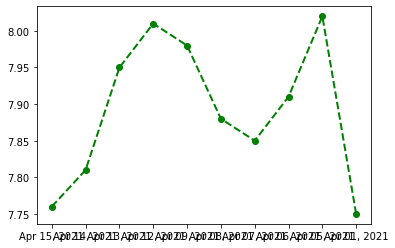

Created HTML File for MGI
Created MGI.csv
[7.28, 6.88, 6.45, 6.46, 6.64, 7.41, 7.18, 7.18, 7.43, 6.66]


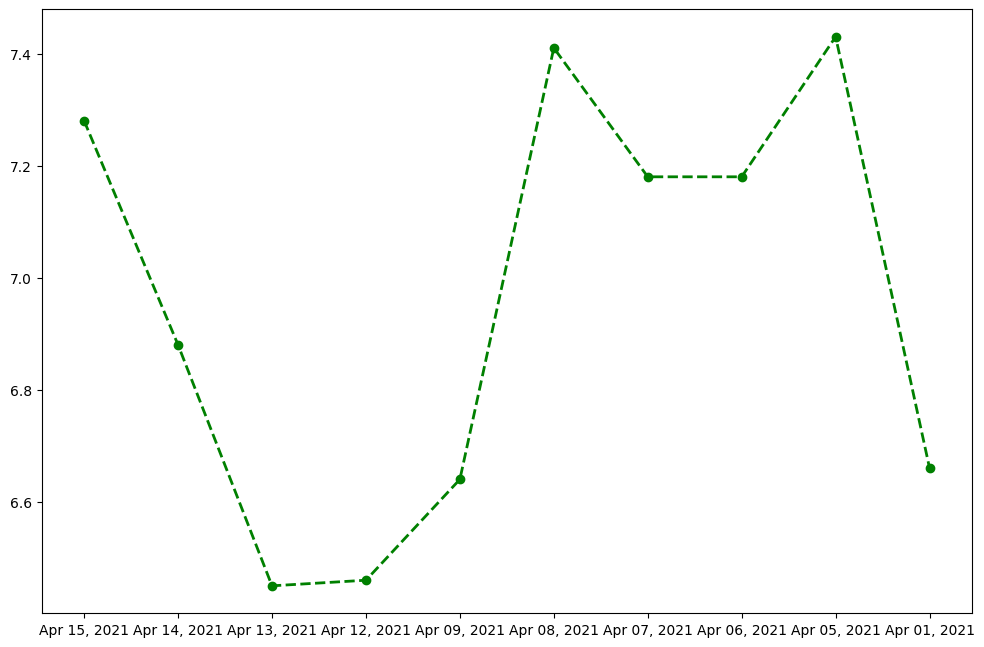

Created HTML File for EBON
Created EBON.csv
[4.62, 5.18, 4.92, 5.16, 5.084, 5.19, 5.67, 5.23, 7.51, 6.81]


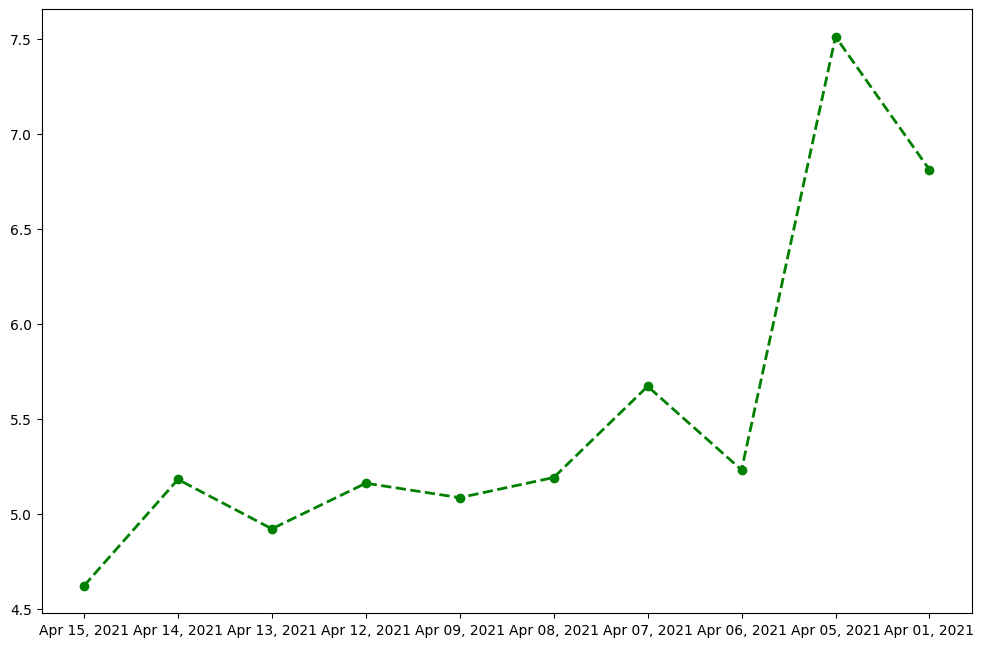

Created HTML File for GPX
Created GPX.csv
[16.94, 17.56, 16.74, 16.77, 16.5, 16.48, 17.17, 17.33, 17.82, 17.45]


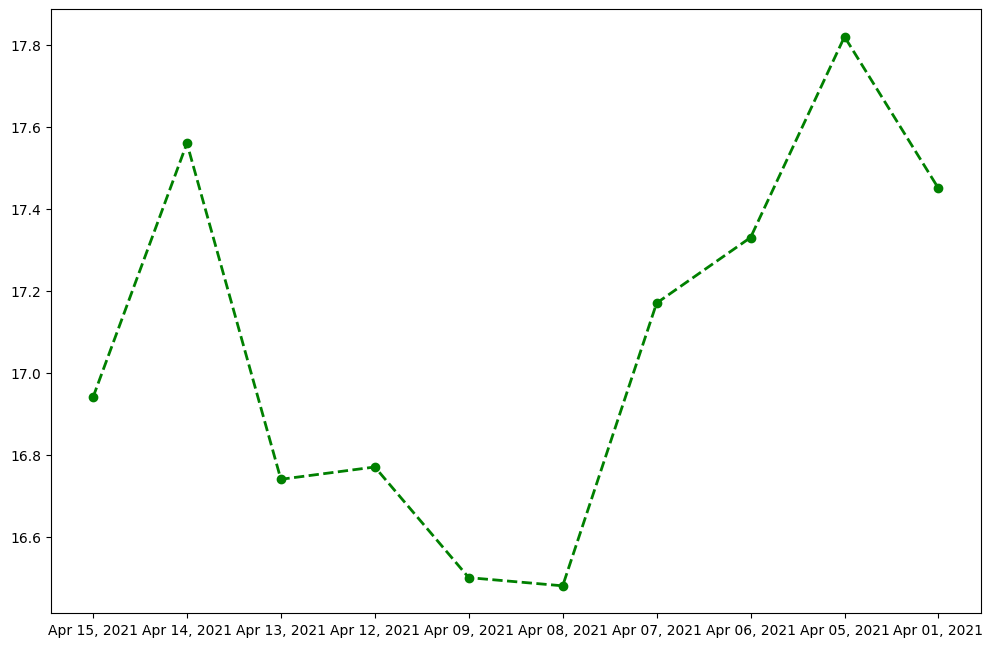

Created HTML File for VIPR
Created HTML File for VIPRF
Created VIPRF.csv
[0.48, 0.506, 0.4973, 0.4261, 0.4727, 0.489, 0.4939, 0.5627, 0.5702, 0.51]


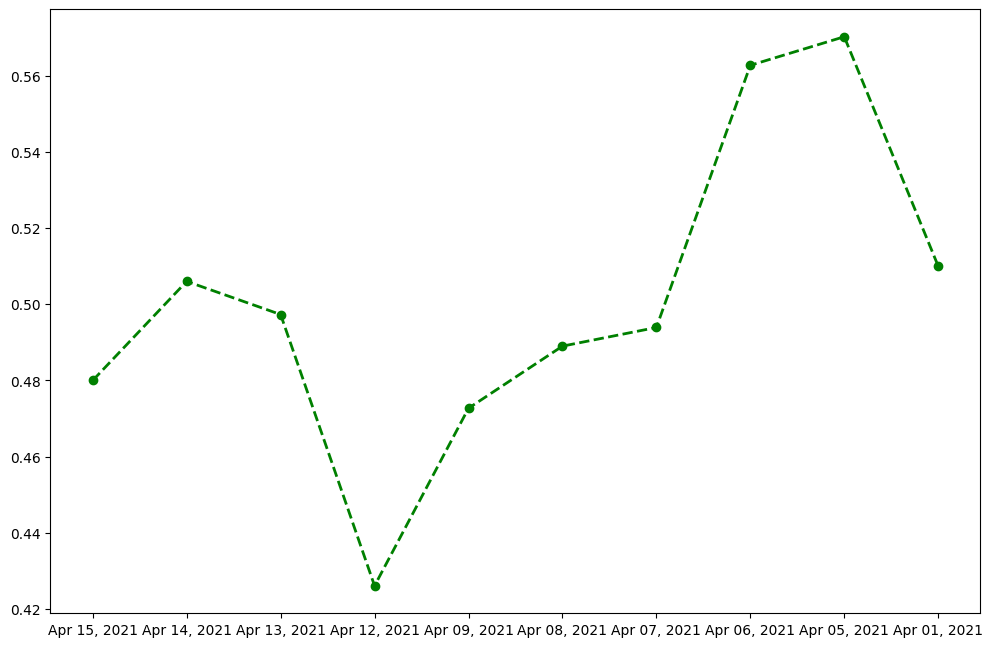

Created HTML File for GRAMF
Created GRAMF.csv
[7.41, 7.94, 7.69, 8.01, 8.05, 7.77, 8.16, 7.75, 7.97, 7.51]


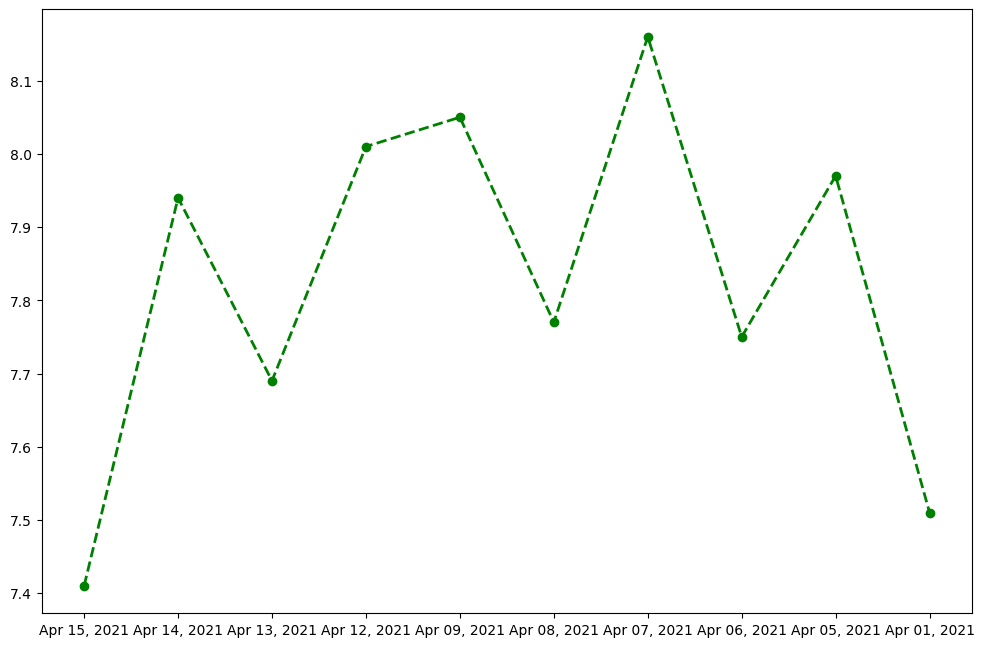

Created HTML File for GRMWF
Created GRMWF.csv
[1.75, 1.888, 2.01, 1.53, 2.15, 2.0, 2.2, 2.14, 2.302, 2.1]


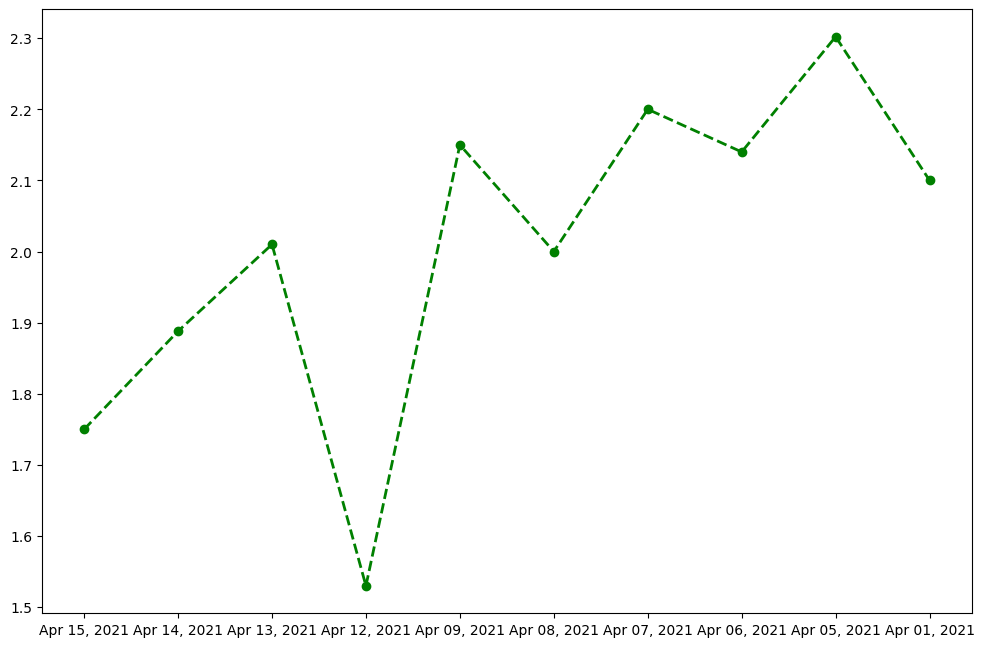

Created HTML File for BLL
Created BLL.csv
[90.09, 90.49, 90.31, 89.86, 88.81, 86.78, 87.95, 87.07, 86.48, 85.4]


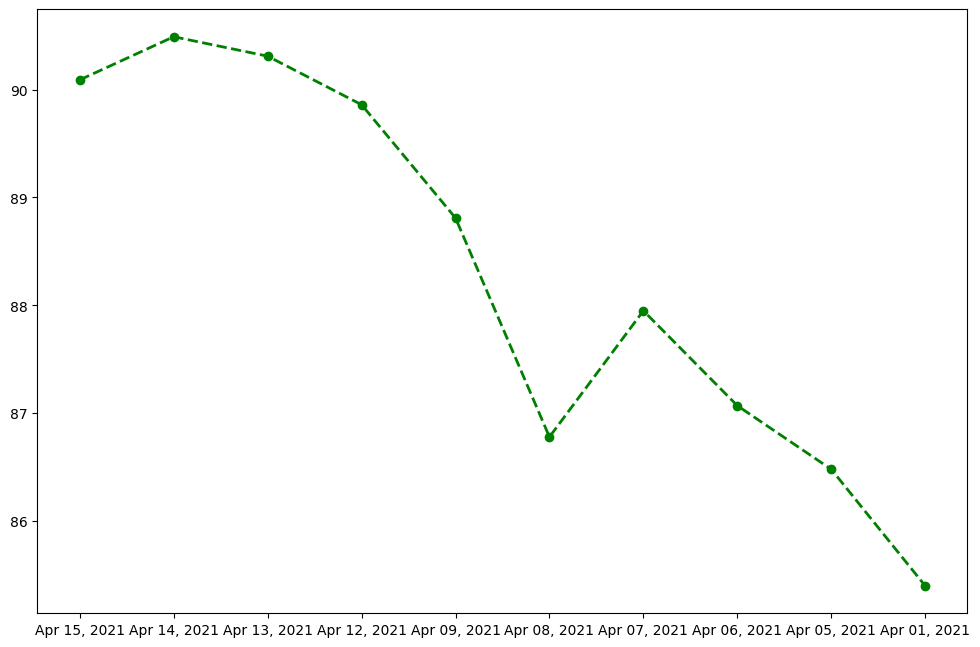

Created HTML File for NVST
Created NVST.csv
[41.81, 41.82, 41.88, 41.84, 43.5, 43.4, 44.74, 41.76, 41.23, 40.59]


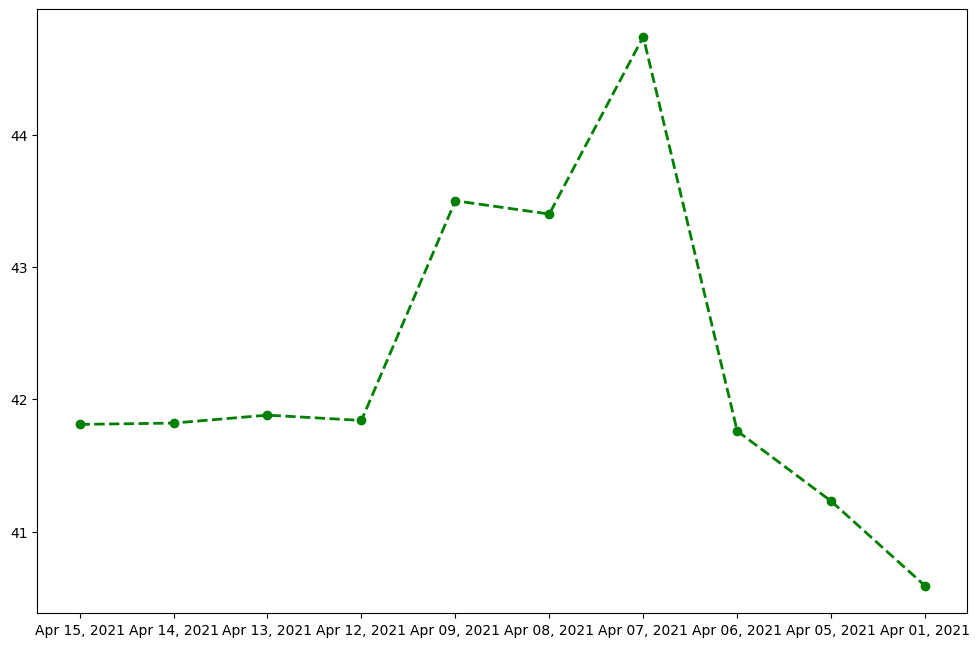

Created HTML File for IDCC
Created IDCC.csv
[72.65, 71.86, 70.3, 0.35, 70.99, 72.73, 71.82, 71.03, 65.94, 64.67]


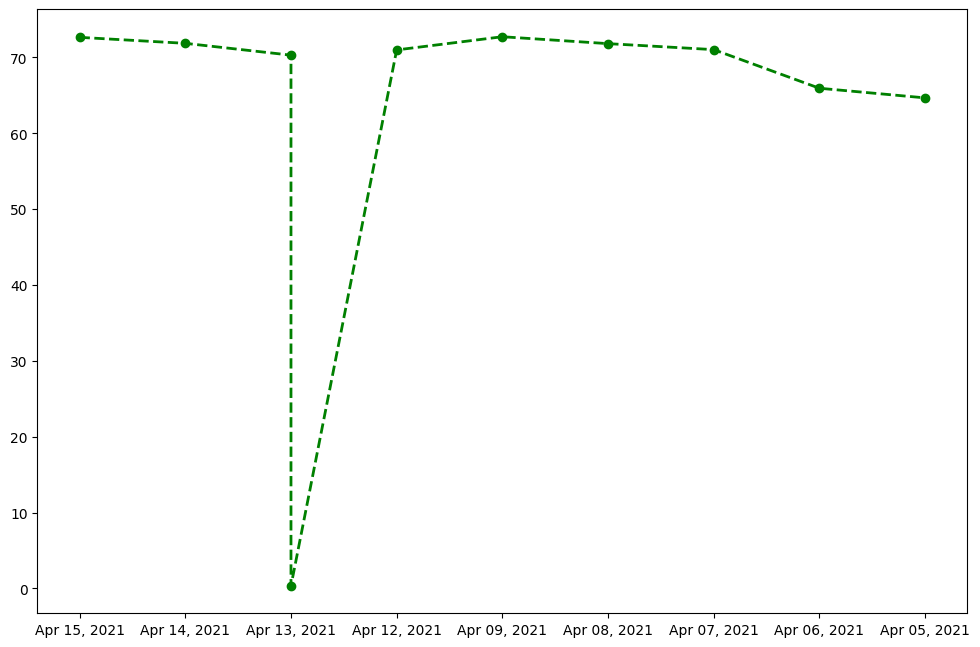

Created HTML File for KAVL
Created KAVL.csv
[1.88, 2.12, 2.12, 2.6, 2.1, 1.65, 1.52, 1.46, 1.31, 1.1]


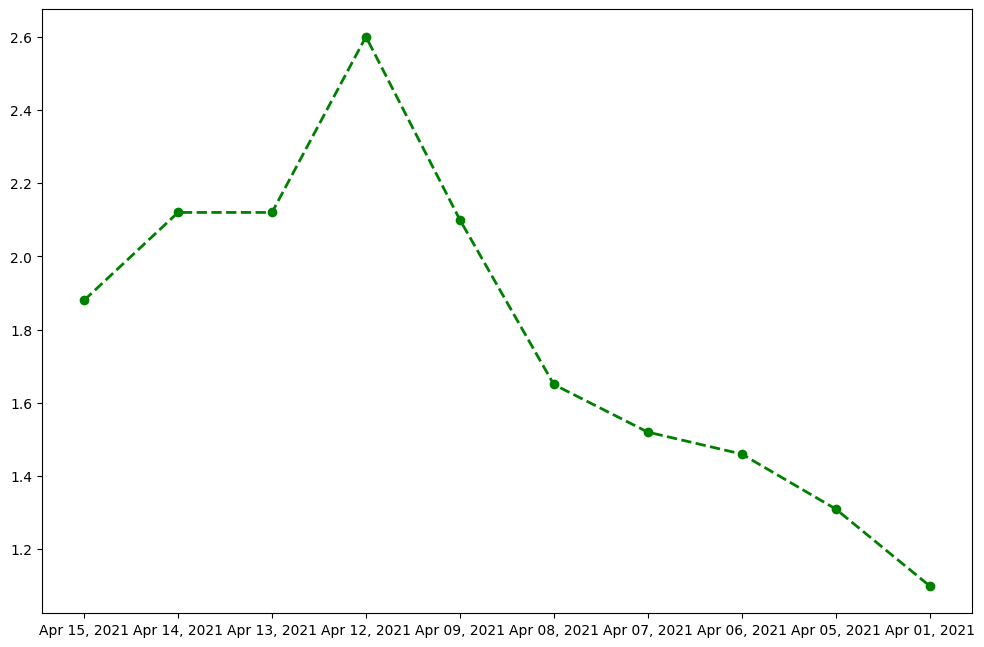

Created HTML File for PPL
Created PPL.csv
[28.75, 28.6, 28.5, 28.75, 28.72, 28.98, 28.77, 28.81, 28.82, 28.9]


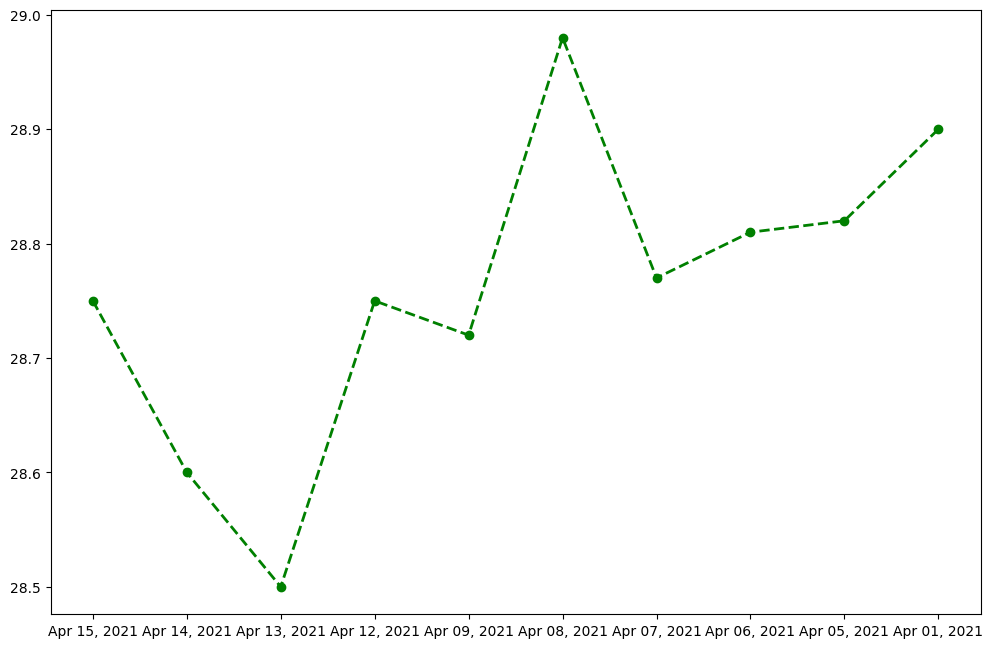

Created HTML File for PBA
Created PBA.csv
[29.81, 29.3, 29.09, 29.28, 29.31, 29.26, 29.48, 29.36, 29.19, 28.99]


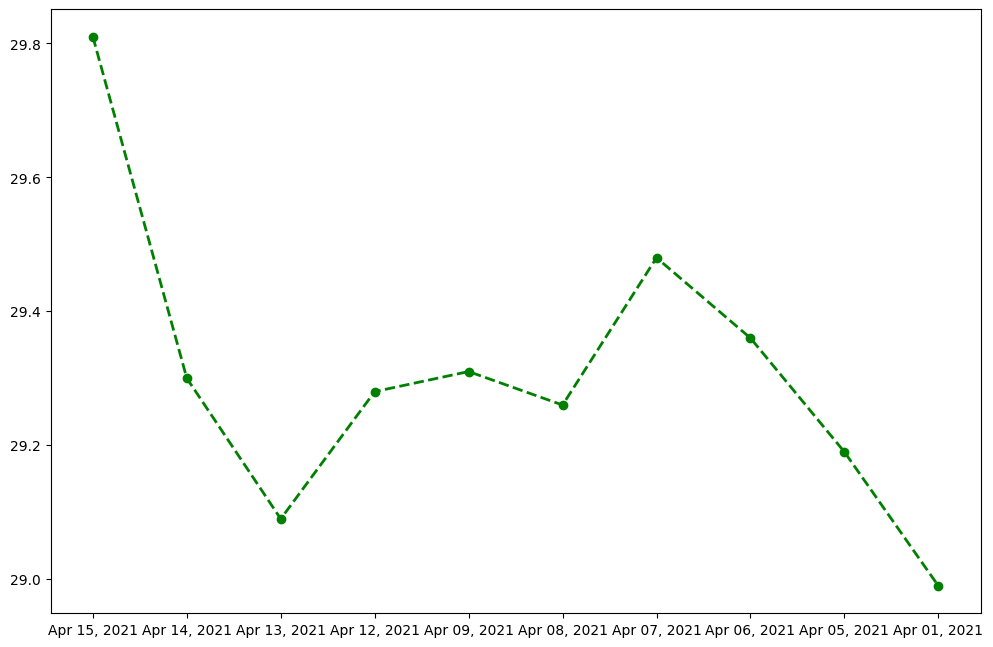

Created HTML File for WFG
Created WFG.csv
[84.75, 82.23, 82.39, 80.09, 82.32, 80.12, 76.2, 75.52, 75.0, 72.37]


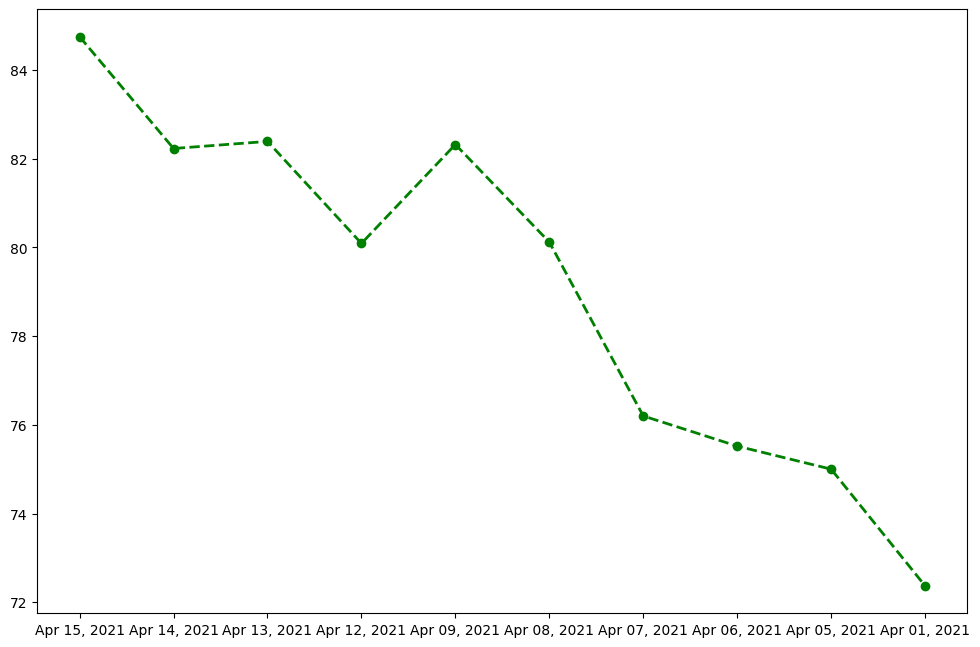

Created HTML File for RENN
Created RENN.csv
[8.55, 8.23, 8.05, 8.29, 8.88, 8.12, 8.57, 8.92, 9.05, 8.84]


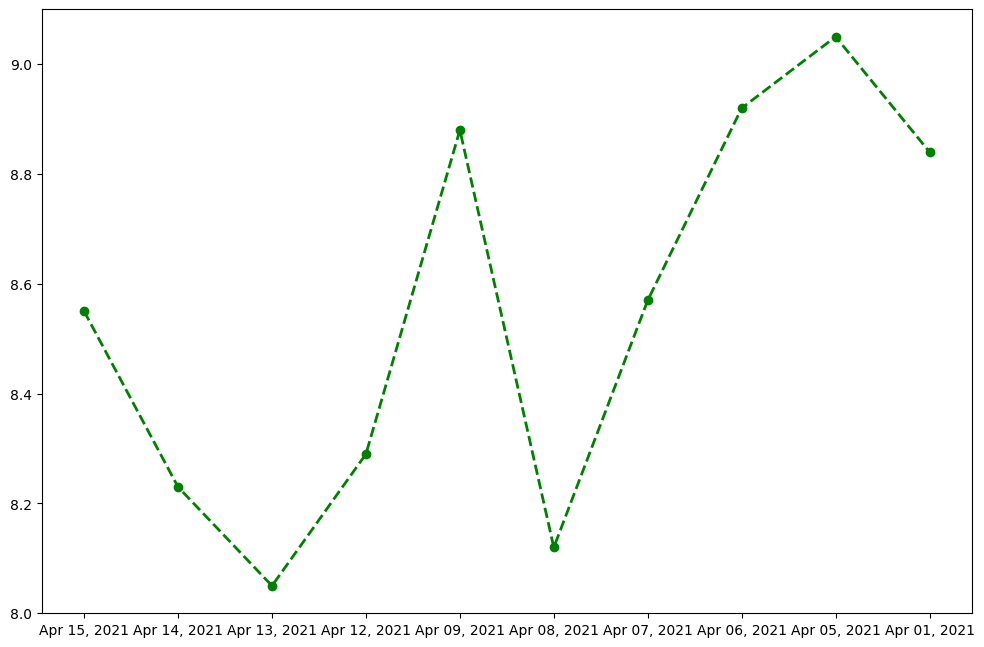

Created HTML File for AMH
Created AMH.csv
[34.42, 34.59, 34.45, 34.19, 34.19, 34.27, 34.43, 33.66, 34.4, 33.54]


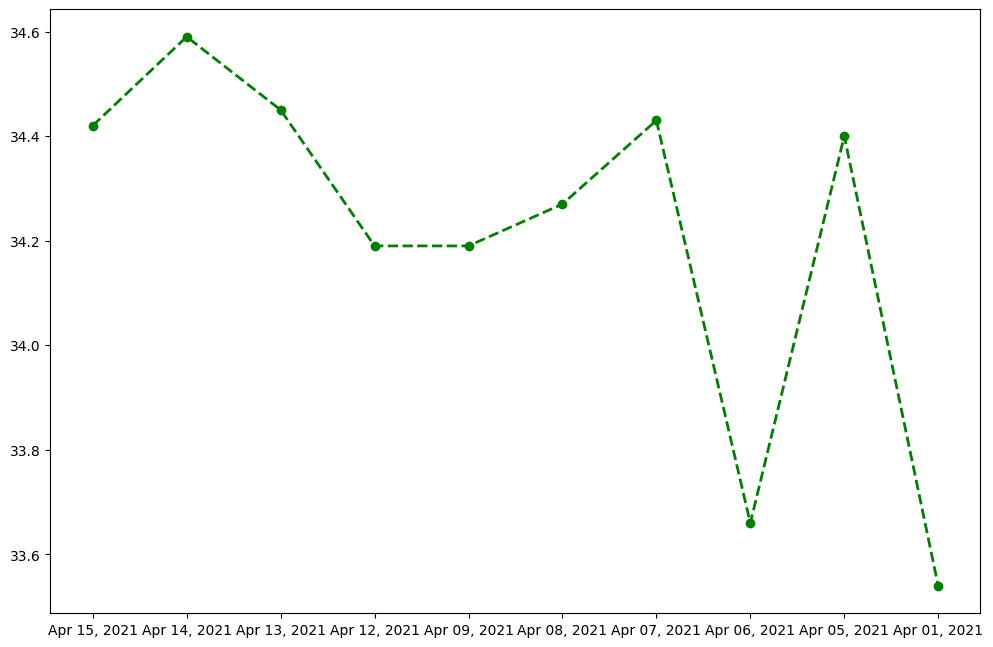

Created HTML File for RTX
Created RTX.csv
[78.16, 78.0, 78.0, 78.25, 78.54, 77.13, 77.49, 77.59, 77.86, 77.61]


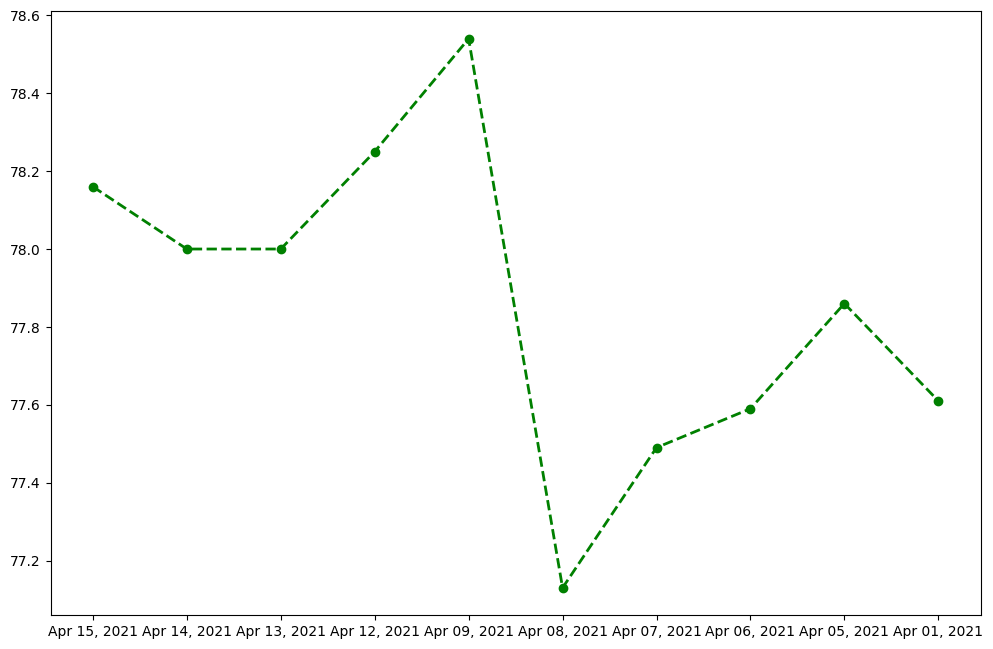

Created HTML File for AES
Created AES.csv
[28.5, 28.13, 27.73, 27.69, 27.5, 27.26, 27.79, 27.26, 27.43, 27.04]


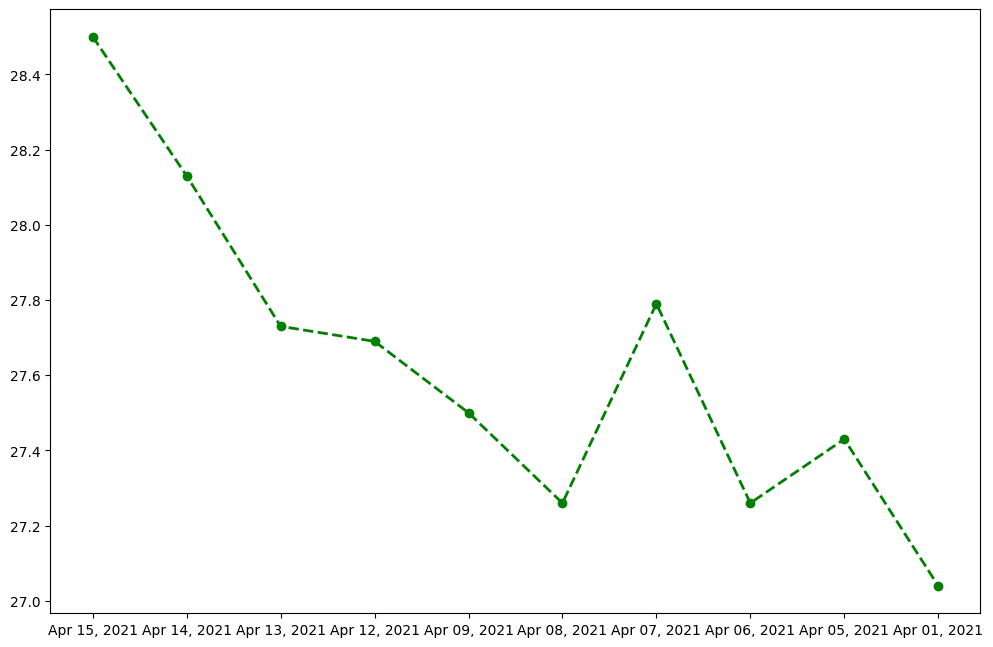

In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import re
import urllib
import csv
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup

#fetching details from  finance.yahoo
def fetch_stock_prices(stock_symbol_postfix):
  for stock_symbol in stock_symbol_postfix:
    yahoo_url = 'https://finance.yahoo.com/quote/'+stock_symbol+'/history?p='+stock_symbol
    yahoo_hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
          'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
          'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
          'Accept-Encoding': 'none',
          'Accept-Language': 'en-US,en;q=0.8',
          'Connection': 'keep-alive'}

    yahoo_UClient = uReq(urllib.request.Request(yahoo_url, headers=yahoo_hdr))
    yahoo_page = yahoo_UClient.read()
    yahoo_UClient.close()
    yahoo_page_soup = soup(yahoo_page, 'html.parser')
    table_from_page = yahoo_page_soup.select('table.W(100%).M(0)')
    if len(table_from_page)>1:
      html_str = table_from_page[1].prettify()
      Html_file= open(stock_symbol + ".html","w")
      Html_file.write(html_str)
      print("Created HTML File for " + stock_symbol)
      Html_file.close()
      save_to_csv(stock_symbol)

fetch_stock_prices(stock_symbol_postfix)